# Part 1 - Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
dataset = pd.read_excel('RP_arrival_all2.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass               1064 non-null   float64
 1   Standoff distance  1064 non-null   int64  
 2   Angle              1064 non-null   int64  
 3   Arrival time       1064 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 33.4 KB


In [3]:
dataset.head()

,Mass,Standoff distance,Angle,Arrival time
0,0.5,5,0,10.055926
1,0.5,5,15,10.536600
2,0.5,5,30,12.221524
3,0.5,5,45,15.898340
4,2.5,5,0,7.722725


In [4]:
y = dataset['Arrival time']
X = dataset.drop(['Arrival time'], axis=1)
print(X.shape, y.shape)

(1064, 3) (1064,)


In [5]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 0)

In [7]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

In [8]:
print (len(X_train))

744


# Part 2 - Building the ANN

In [9]:
ann = tf.keras.models.Sequential()

In [10]:
ann.add(tf.keras.layers.Dense(units=8,
                              input_shape=(X_train.shape[1],),
                              activation='leaky_relu'))
ann.add(tf.keras.layers.Dense(units=7,
                              activation='leaky_relu'))
ann.add(tf.keras.layers.Dense(units=5,
                              activation='leaky_relu'))

In [11]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

In [12]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 32        
                                                                 
 dense_1 (Dense)             (None, 7)                 63        
                                                                 
 dense_2 (Dense)             (None, 5)                 40        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


# Part 3 - Training the ANN

In [13]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.01)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

In [14]:
# protects from unnecessary further training of the model
#if a particular metric does not continue to improve over a number of n epochs.
#In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [15]:
print (X_val, y_val)

[[34.5 30.  30. ]
 [26.5 23.  30. ]
 [ 8.5 30.  30. ]
 [10.5 25.  45. ]
 [ 0.5 11.  30. ]
 [ 2.5  5.  30. ]
 [ 2.5 23.  15. ]
 [ 2.5 30.   0. ]
 [ 6.5 13.   0. ]
 [12.5 11.  45. ]
 [18.5 17.  45. ]
 [32.5 17.  15. ]
 [24.5 27.  45. ]
 [30.5 25.  45. ]
 [10.5 25.  15. ]
 [20.5 30.  15. ]
 [12.5 21.  30. ]
 [34.5 30.  15. ]
 [28.5 25.  30. ]
 [ 0.5 30.   0. ]
 [26.5 29.  30. ]
 [34.5 11.  30. ]
 [32.5 17.  45. ]
 [ 2.5 25.   0. ]
 [26.5 15.   0. ]
 [ 4.5 11.  45. ]
 [12.5 27.   0. ]
 [ 0.5 23.  30. ]
 [35.   5.  45. ]
 [32.5  7.  15. ]
 [10.5 29.  30. ]
 [24.5 15.  45. ]
 [12.5 23.   0. ]
 [ 8.5 19.   0. ]
 [20.5 11.  45. ]
 [35.  17.  30. ]
 [30.5 23.  45. ]
 [30.5  9.  30. ]
 [ 0.5 27.  30. ]
 [ 6.5  5.  30. ]
 [20.5 25.   0. ]
 [20.5 30.   0. ]
 [20.5  9.  15. ]
 [12.5 19.  15. ]
 [ 4.5 17.  15. ]
 [18.5 25.  45. ]
 [12.5  7.  45. ]
 [14.5 15.   0. ]
 [18.5 30.  30. ]
 [24.5 27.   0. ]
 [24.5 19.  30. ]
 [ 0.5 23.  15. ]
 [30.5 23.   0. ]
 [30.5  9.  45. ]
 [ 0.5 17.  30. ]
 [14.5 17.

In [16]:
print(X_train, y_train)

[[18.5 19.  15. ]
 [ 2.5 13.  30. ]
 [26.5 15.  30. ]
 ...
 [35.  25.  45. ]
 [12.5 19.  45. ]
 [ 0.5 23.   0. ]] [ 41.5982505   35.15261878  33.49990316  42.09262435  14.74666325
  82.79975079  53.26801078  31.14101489  37.10770351  69.87173682
  53.352885     8.84438667  55.79859497  26.91003413  18.38264856
  14.56778086  65.97663464  15.18013989  38.28202096  84.37766093
  68.57374724 107.15436324  26.25686917  38.55307109  50.61178771
  80.8985433    8.62494884   9.72086901   3.97694421  13.65010638
  45.52050237 110.38688704  33.58788672  23.460457    54.00989217
  36.19350609  32.47529176  62.89361047  76.00908822  70.30709036
  85.75252019  11.971403     5.55985535  34.83169921  97.81879386
  26.61382279  53.82078816  17.59447147  58.87989143   7.55807648
   4.6886565   24.08899422  46.88245909 103.95851558   8.45482514
  17.13638137  15.66816226   4.39952508  37.49593557  30.74818839
  91.42931646 103.71224344  67.17920075  49.87039801  24.24855717
   4.04967631  61.49238536  

In [17]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=30,
                    verbose=1)

Epoch 1/500
25/25 [==============================] - 1s 13ms/step - loss: 2369.0042 - mae: 40.9729 - val_loss: 1353.8988 - val_mae: 30.3719
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 723.8254 - mae: 21.5502 - val_loss: 459.9568 - val_mae: 17.7549
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 285.5598 - mae: 13.1652 - val_loss: 66.8668 - val_mae: 5.9486
Epoch 4/500
25/25 [==============================] - 0s 4ms/step - loss: 67.1730 - mae: 6.7604 - val_loss: 59.4879 - val_mae: 6.4517
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 53.7440 - mae: 5.8939 - val_loss: 50.1063 - val_mae: 5.5337
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 50.8257 - mae: 5.6972 - val_loss: 50.1685 - val_mae: 5.7834
Epoch 7/500
25/25 [==============================] - 0s 3ms/step - loss: 52.1242 - mae: 5.8892 - val_loss: 45.9314 - val_mae: 5.3718
Epoch 8/500
25/25 [==============================] - 0s 

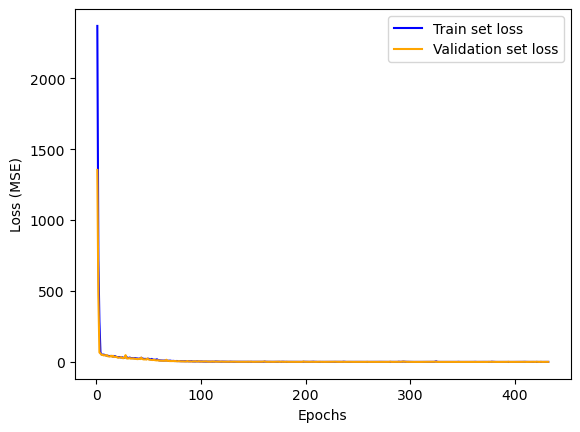

In [18]:
import matplotlib.pyplot as plt
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('Arrival_ANN3_2.png', dpi = 300, bbox_inches = 'tight')
plt.show()

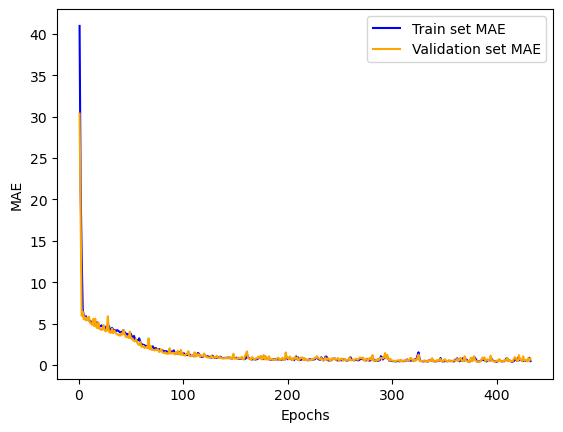

In [19]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.savefig('Arrival_ANN3_3.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [20]:
print (epochs)

range(1, 433)


In [21]:
ann.save('Arrival_ANN3')

INFO:tensorflow:Assets written to: Arrival_ANN3\assets


# Part 4 - Make predictions

5/5 [==============================] - 0s 4ms/step


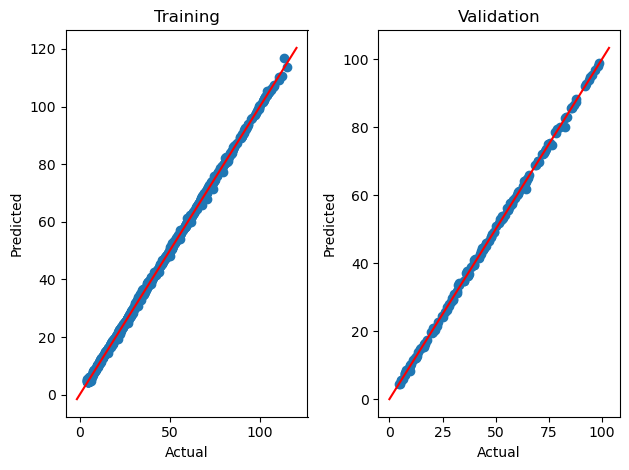

In [22]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

plt.savefig('Arrival_ANN3_1.png', dpi = 300, bbox_inches = 'tight')
# show the plot
plt.show()

In [23]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

5/5 [==============================] - 0s 63ms/step
[[ 36.66  38.19]
 [ 51.16  51.03]
 [  9.24   9.36]
 [ 73.46  72.62]
 [ 49.89  49.65]
 [ 58.2   57.59]
 [ 69.66  69.39]
 [ 67.37  67.22]
 [ 47.    46.92]
 [ 29.95  30.26]
 [ 80.42  80.57]
 [ 97.68  97.97]
 [ 20.56  20.44]
 [  5.4    5.73]
 [ 44.62  44.91]
 [ 27.72  27.92]
 [ 59.15  58.71]
 [ 78.72  78.7 ]
 [ 28.35  28.73]
 [ 23.05  23.57]
 [ 23.2   23.88]
 [ 52.69  52.63]
 [ 42.04  41.5 ]
 [ 64.95  65.11]
 [ 50.77  50.7 ]
 [ 57.88  57.99]
 [ 28.21  28.73]
 [108.34 109.06]
 [ 32.48  32.48]
 [101.4  101.18]
 [ 34.2   34.66]
 [ 81.13  81.15]
 [113.43 110.48]
 [ 69.89  69.18]
 [ 80.97  80.66]
 [ 38.93  37.82]
 [  9.8    9.68]
 [ 46.94  47.04]
 [ 75.64  75.6 ]
 [ 33.25  33.22]
 [ 21.95  22.19]
 [ 74.94  74.92]
 [ 63.83  64.03]
 [ 76.83  75.73]
 [  8.51   7.85]
 [ 45.14  44.96]
 [ 50.33  49.7 ]
 [  4.56   5.07]
 [ 77.57  77.62]
 [ 50.19  51.89]
 [ 48.29  48.22]
 [ 71.34  70.79]
 [ 66.47  66.2 ]
 [ 32.7   32.9 ]
 [ 40.12  39.19]
 [ 71.63  71.

Text(0, 0.5, 'Predicted data')

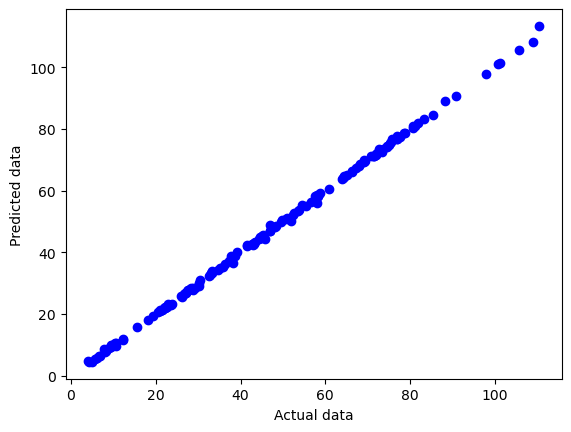

In [24]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
#plt.plot ([0,0.085],[0,0.085], color = "red")
#plt.axis ([0,0.085,0,0.085])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

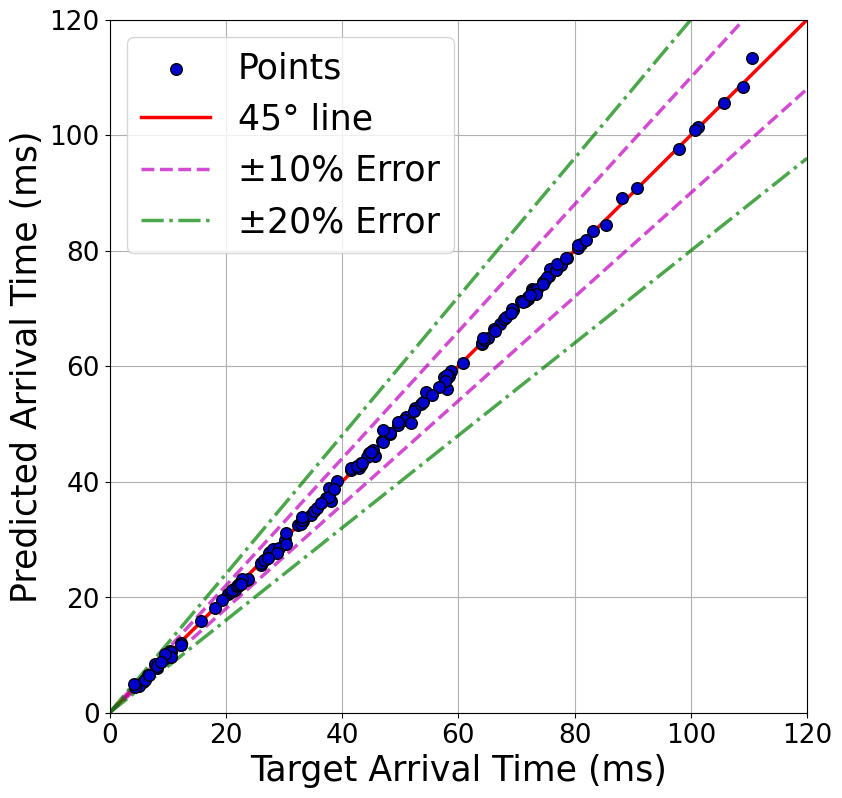

In [25]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Arrival Time (ms)',fontsize = 25)
plt.xlabel('Target Arrival Time (ms)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(0,120)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 120)
plt.xlim(0, 120)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax1.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
#ax1.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

plt.savefig('Arrival_ANN3.png', dpi = 300, bbox_inches = 'tight')

In [26]:
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

24/24 [==============================] - 0s 1ms/step
0.3419371245435016
0.36490087335289373


In [27]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9995185459047544


In [28]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9996454594227416


In [29]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 98.75%
Within 20% margin 100.00%
Out of 20% margin 0.00%


In [30]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9995092871721536


In [31]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

0.5576522113969015

In [32]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.36490087335289373